# <center>Logistic Regression Model To Detect Heart Disease</center>



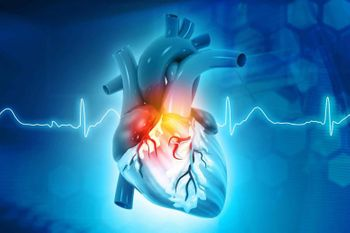

### Premise:

India accounts for one-fifth of the total deaths occurring from stroke and ischemic heart disease, especially in younger adults according to the World Health Organization. “Cardiovascular diseases affect Indians a decade earlier than their western counterparts and nearly 3 million people die of stroke and heart attack every year. The most unfortunate part is that 40 per cent of those who suffer a heart attack are below the age of 55,” said Dr Harinder K. Bali, Chairman, Cardiac Sciences, Paras Hospitals, Panchkula.

“With the incidences of heart disease deaths rising in India by 34 per cent over the last 26 years, it is time to be aware of this serious issue and take necessary steps to reduce the burden of cardiovascular disease in the country,” he continued.


Being informed about the risk factors can help people to manage their symptoms early and avoid the chances of a sudden heart attack. (https://indianexpress.com/article/lifestyle/health/world-heart-day-2021-risk-factors-symptoms-treatment-young-adults-7537442/)


### GOAL: 

**Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. **The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence).** In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* **target:**
     - **0 for no presence of heart disease,** 
     - **1 for presence of heart disease**

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Imports**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

----

**Reading the data.**

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Dictionary

|	Attribute	|	Description
|	--------------	|	--------------
|	age	|	age
|	sex	|	sex
|	cp	|	chest pain type (4 values)
|	trestbps	|	resting blood pressure
|	chol	|	serum cholestoral in mg/dl
|	fbs	|	fasting blood sugar > 120 mg/dl
|	restecg	|	resting electrocardiographic results (values 0,1,2)
|	thalach	|	maximum heart rate achieved
|	exang	|	exercise induced angina
|	oldpeak	|	oldpeak = ST depression induced by exercise relative to rest
|	slope	|	the slope of the peak exercise ST segment
|	ca	|	number of major vessels (0-3) colored by flourosopy
|	thal	|	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
|	target	|	target:0 for no presence of heart disease, 1 for presence of heart disease



In [5]:
df['target'].unique()

array([1, 0], dtype=int64)

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Exploratory Data Analysis and Visualization



In [7]:
print("******* Data Information *******")
df.info()


******* Data Information *******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
print("******* Data Types *******")
df.dtypes

******* Data Types *******


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
print("******* Data Summary *******")
df.describe().transpose()


******* Data Summary *******


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
print("******* Null Values *******")
df.isnull().sum()

******* Null Values *******


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Visualizations

**Creating a count plot that shows the total counts per target value.**

Text(0.5, 1.0, 'Countplot for Target Feature')

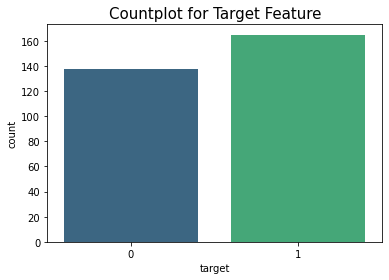

In [11]:
ax = sns.countplot(df["target"], palette='viridis')
ax.set_title('Countplot for Target Feature', fontsize=15)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Visualising the relationships between the features**

<Figure size 2160x2160 with 0 Axes>

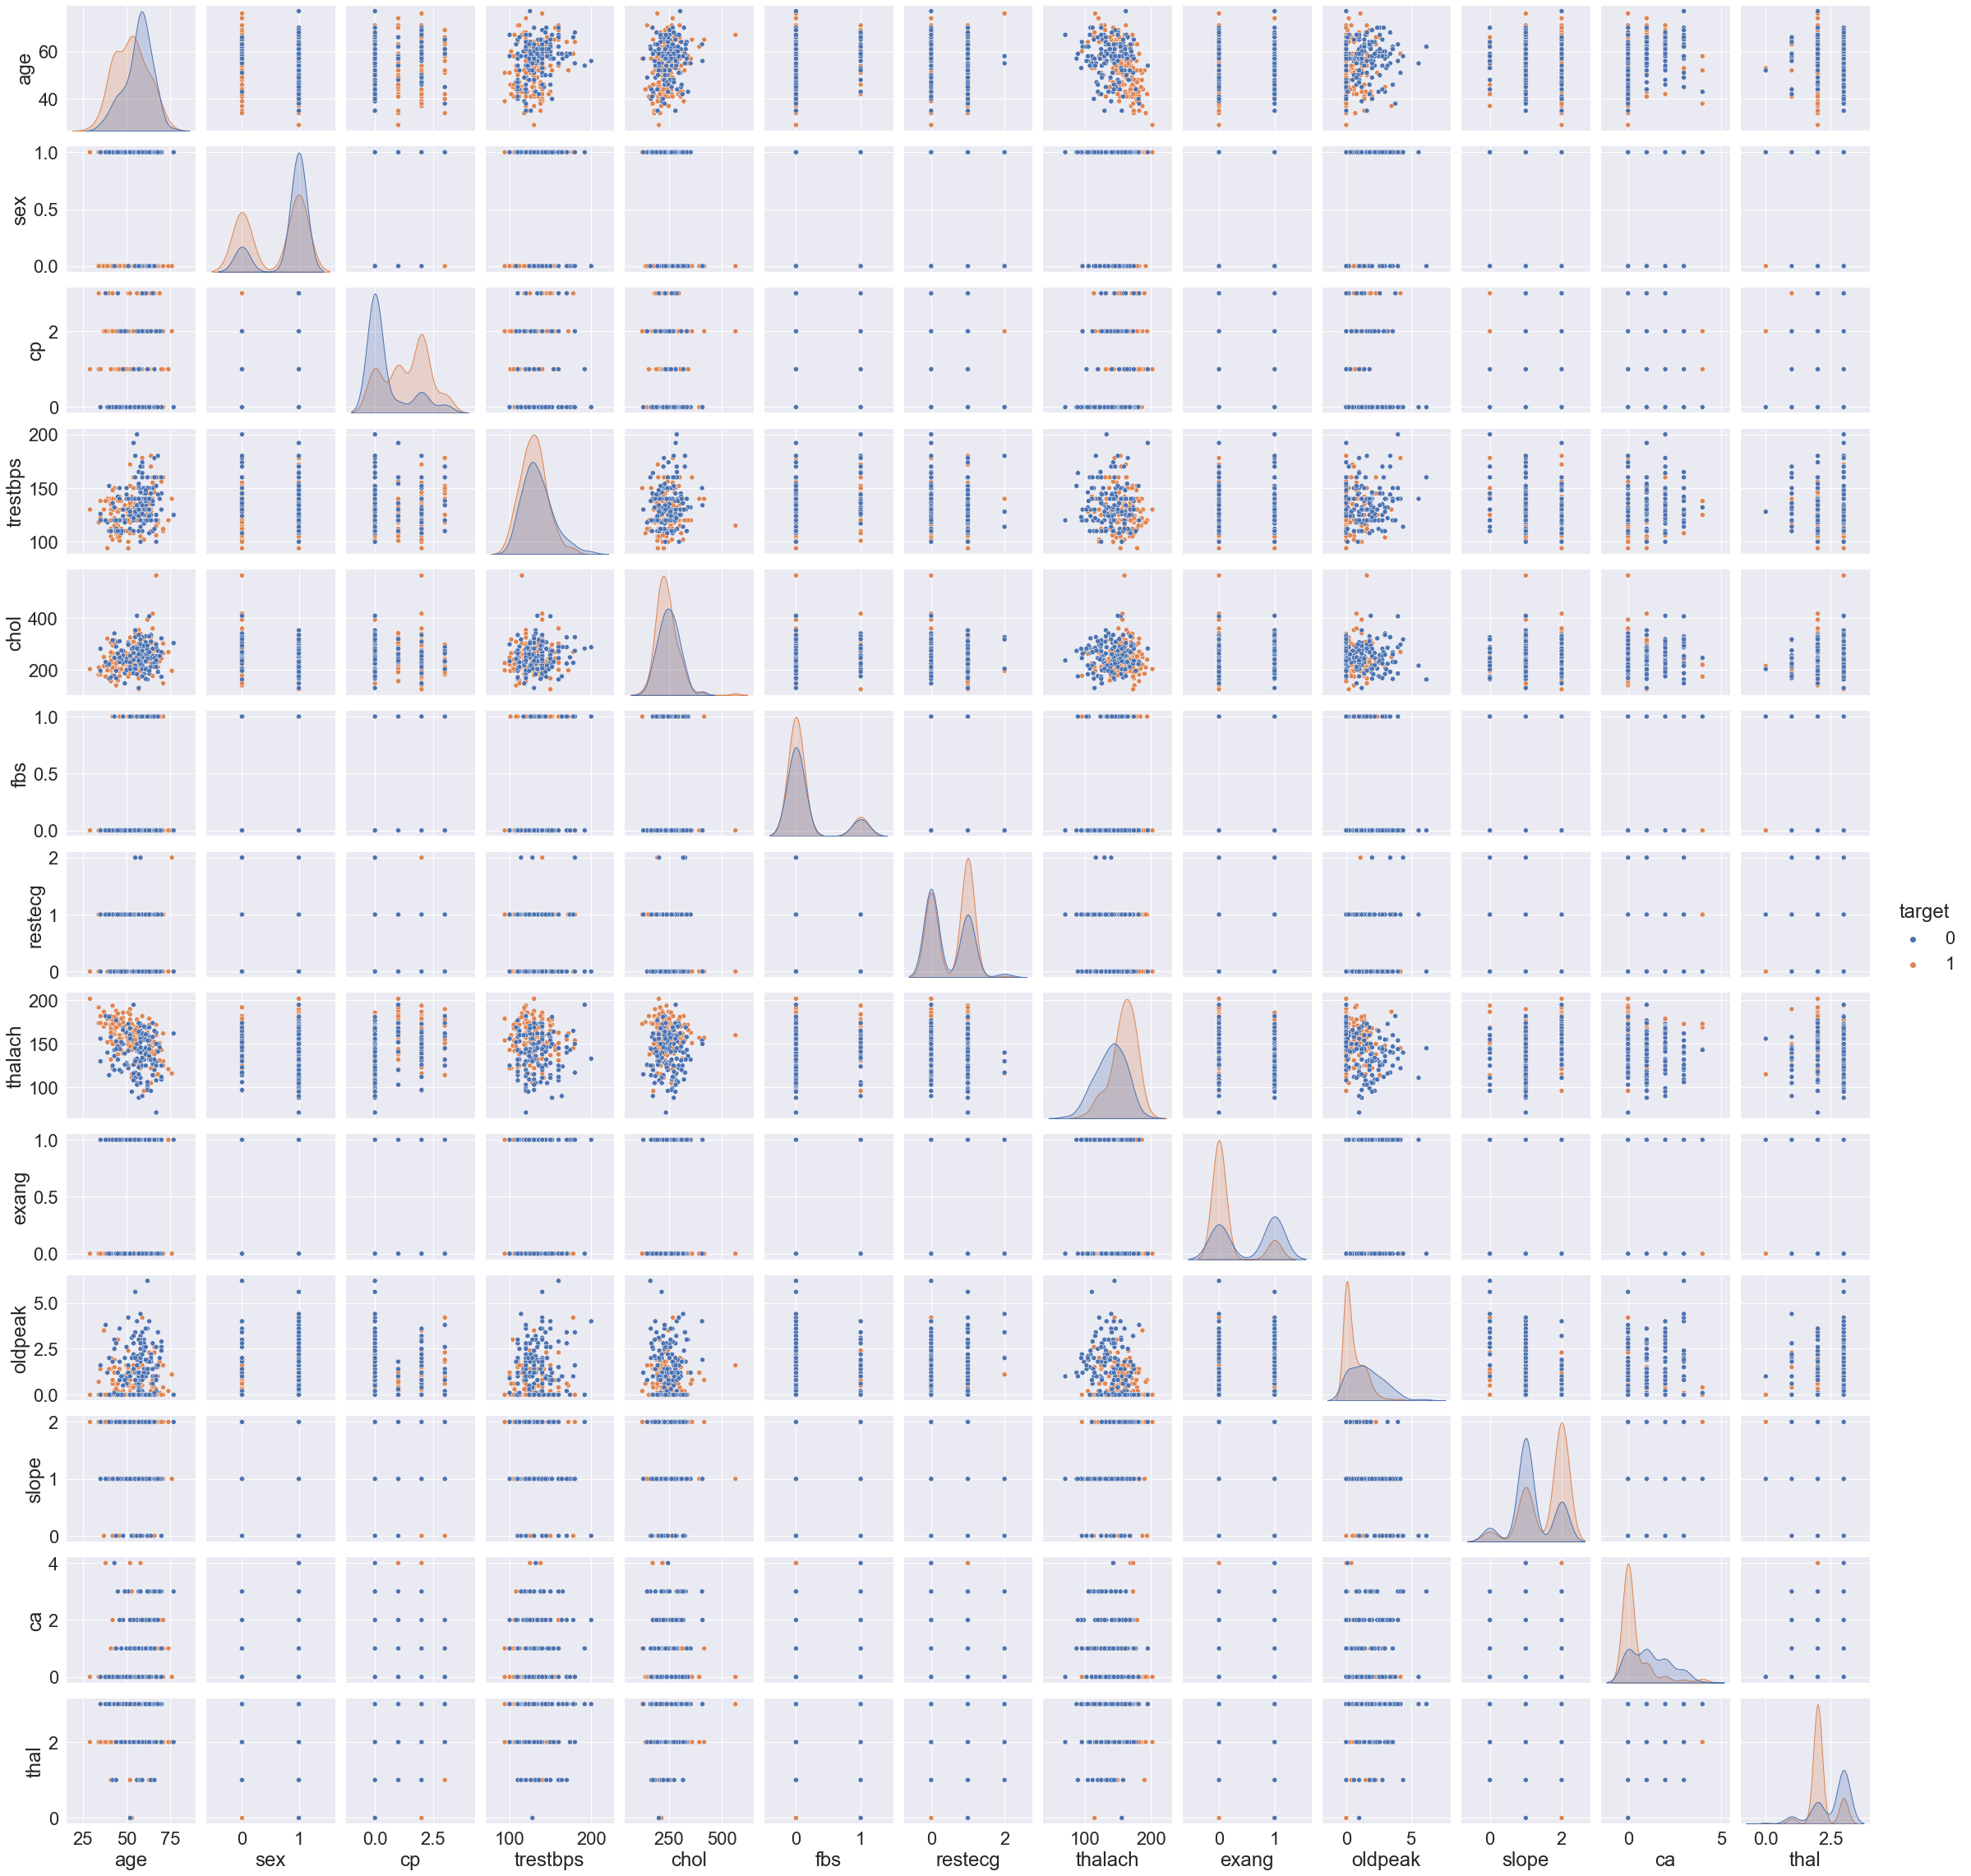

In [13]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.pairplot(df, hue='target')

**Creating a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']


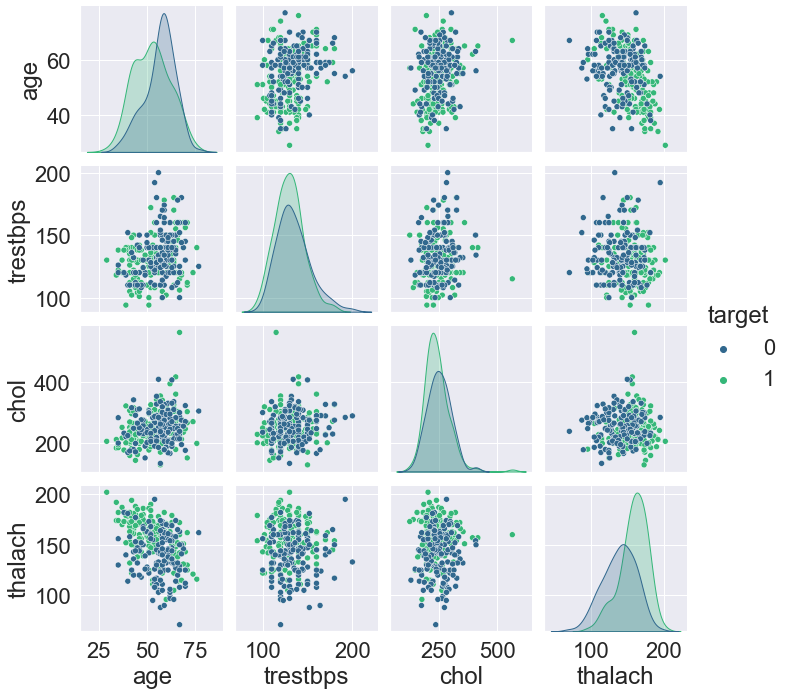

In [14]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue="target", palette = 'viridis')


**Creating boxplot for following Variables**

["age", "trestbps", "chol","restecg", "thalach", "oldpeak"]

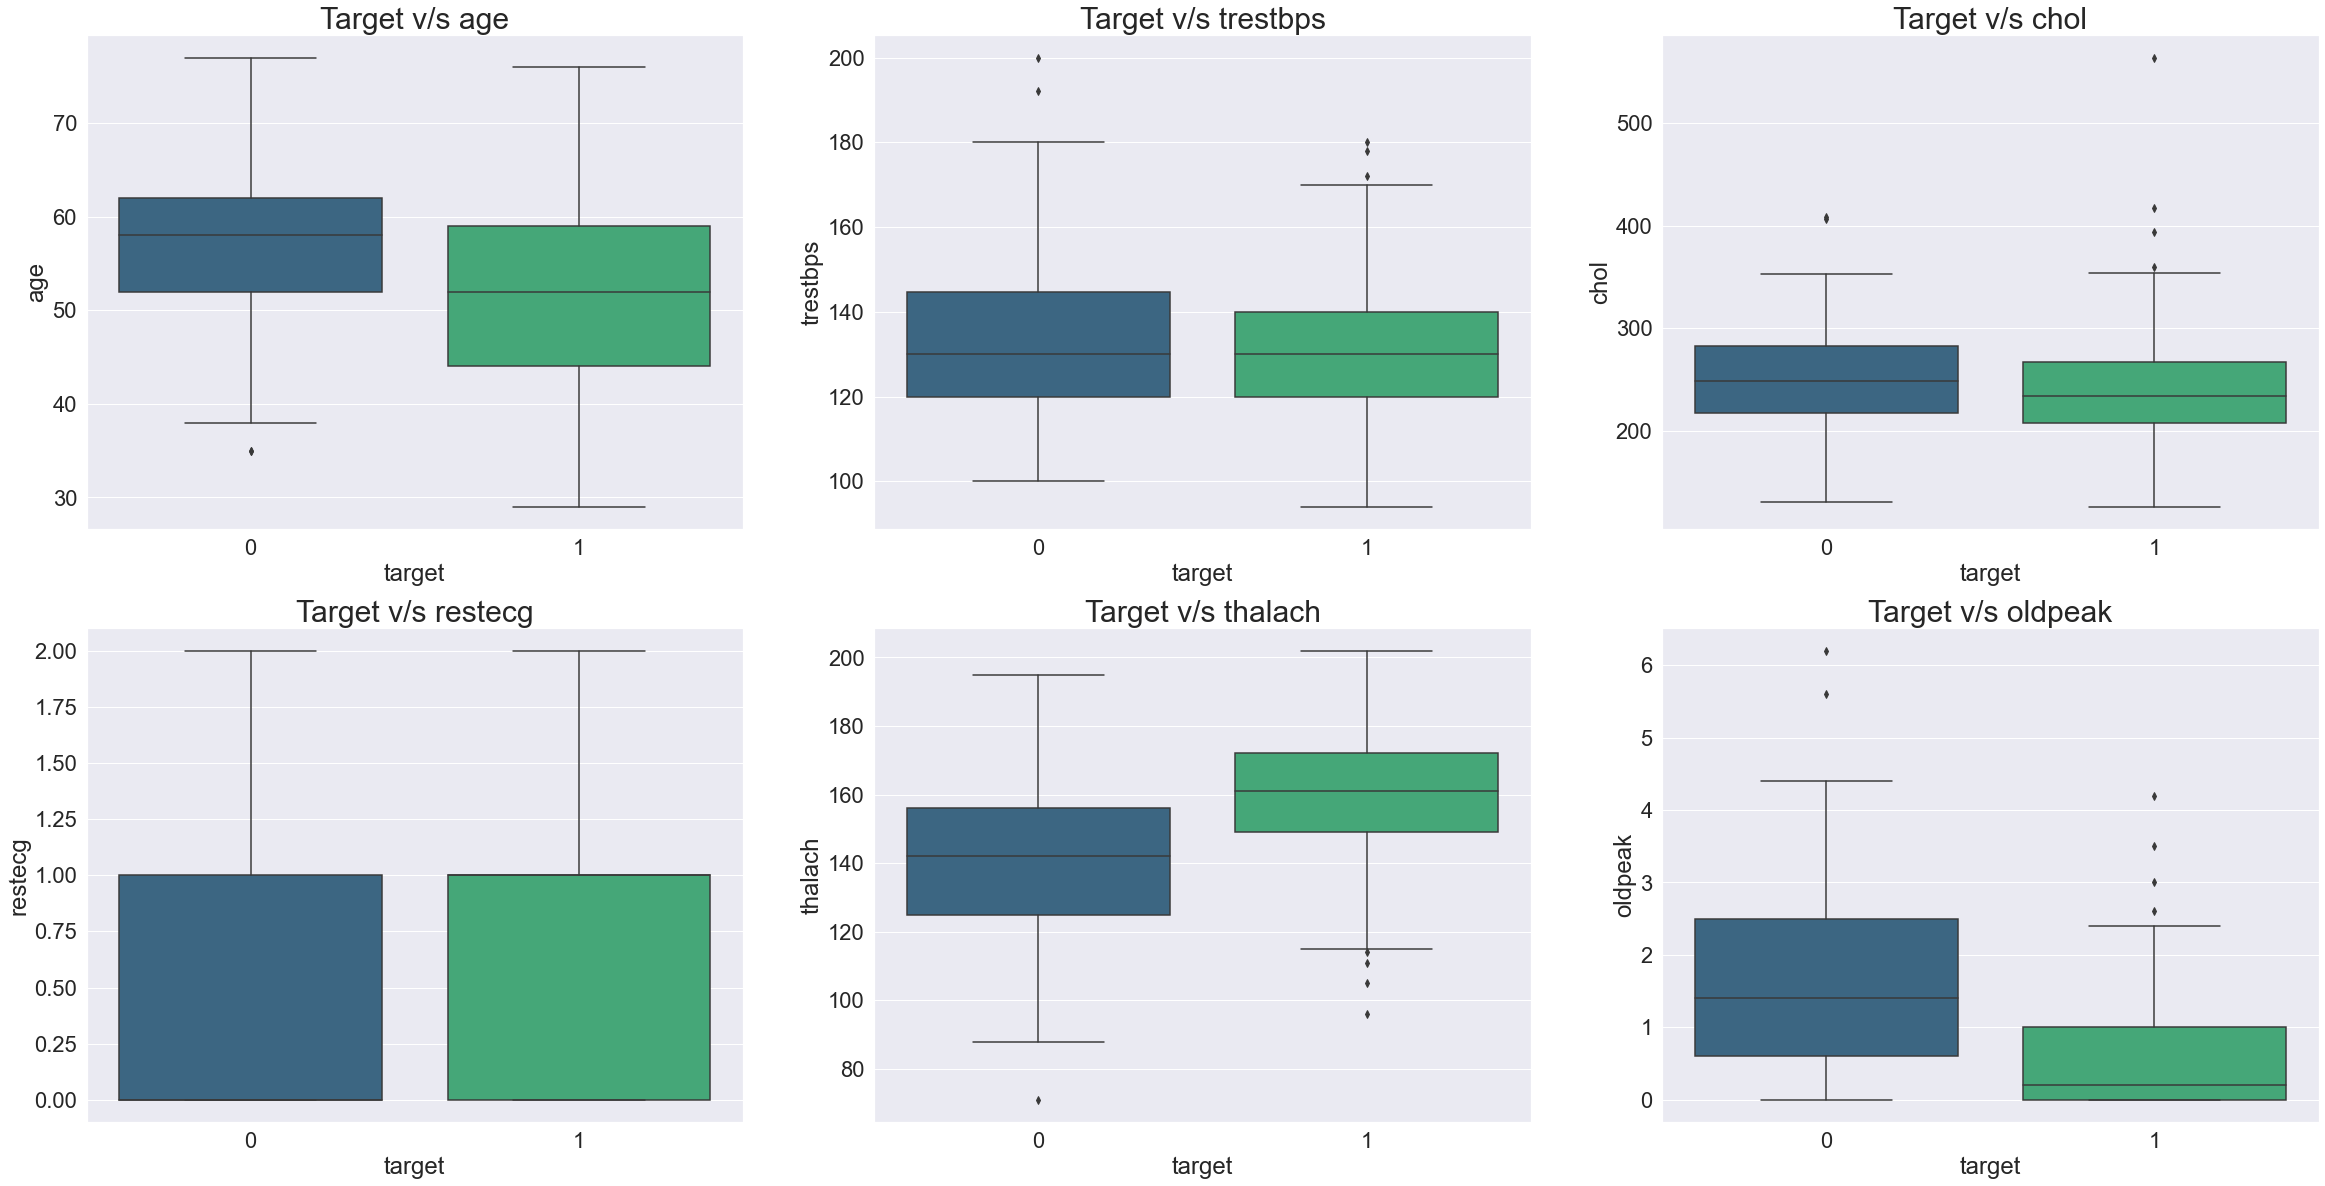

In [15]:
vars = df[["age", "trestbps", "chol","restecg", "thalach", "oldpeak"]]
plt.figure(figsize=(40,20))
sns.set(font_scale=2)
for i in range(len(vars.columns)):
    plt.subplot(2,3, i + 1)
    
    ax=sns.boxplot(y=vars.columns[i], x='target', data=df,palette = 'viridis')
    ax.set_title('Target v/s '+str(vars.columns[i]), fontsize=30)
    
plt.show()

**Creating heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

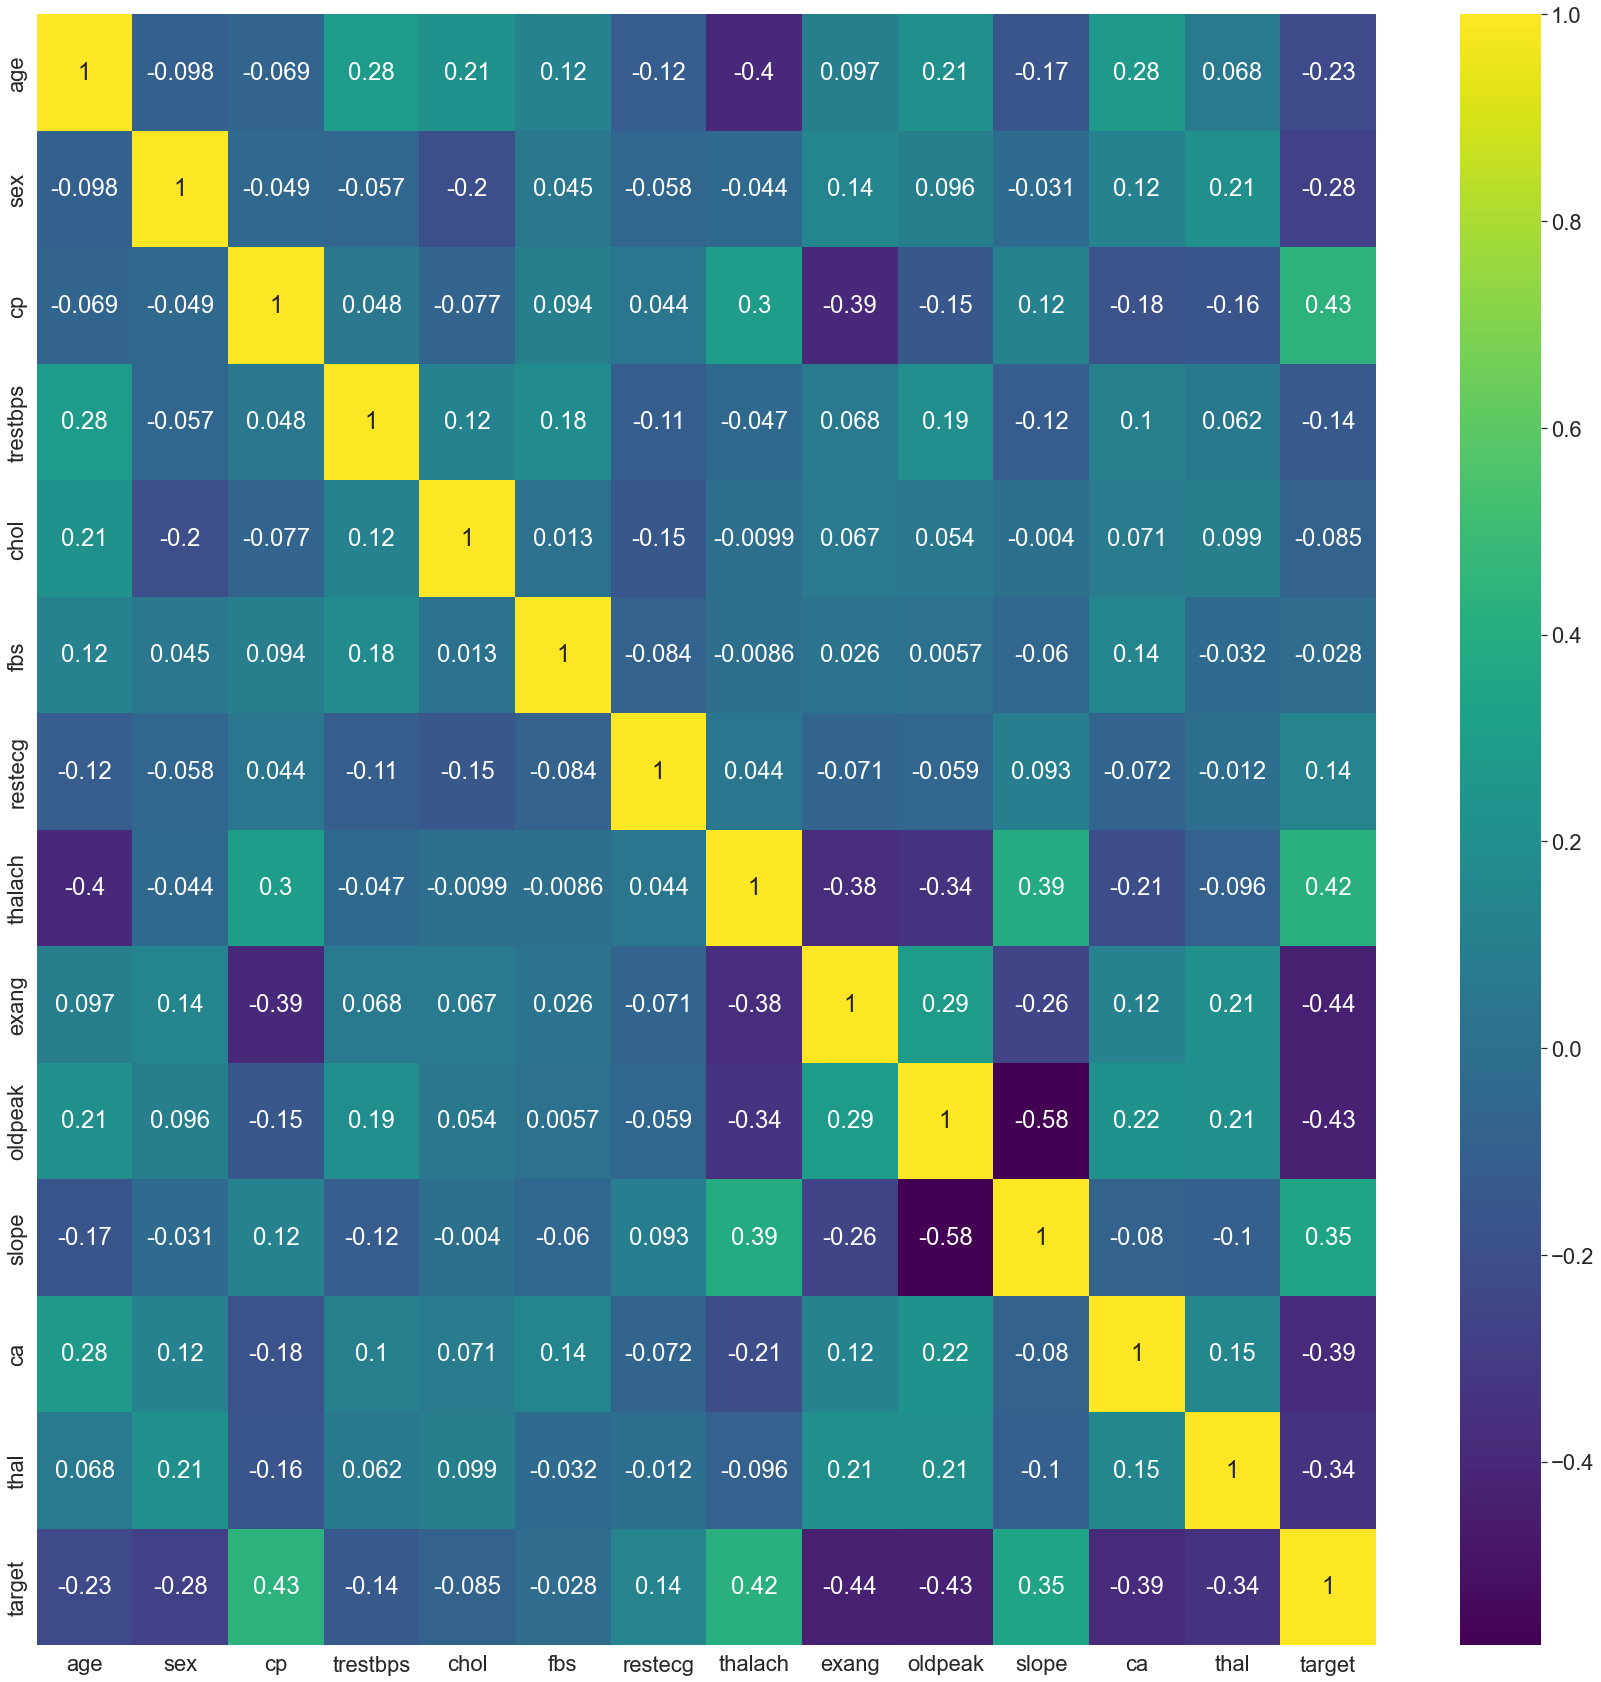

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='viridis')


# Machine Learning

**Separating the features from the labels into 2 objects, X and y.**

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X=df.drop('target',axis=1)

In [19]:
y=df['target']

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Creating a StandardScaler object and normalizing the X train and test set feature data. We only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [22]:
scaler =StandardScaler()

In [23]:
X_train[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']]=scaler.fit_transform(X_train[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']])

In [24]:
X_test[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']] = scaler.transform(X_test[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']])

In [25]:
X_train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,1.049702,1,1.979932,-1.235333,-0.668959,0,-0.995772,-0.262159,1,0.727627,-0.671680,-0.714226,-0.484215
176,0.616441,1,-0.946924,-0.837418,-0.308160,1,0.898284,0.439512,1,0.370702,0.945107,1.238231,1.141790
171,-0.683342,1,0.028695,-1.235333,-0.327149,0,0.898284,0.790348,0,0.013778,-2.288466,-0.714226,1.141790


In [26]:
col =X_train.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### Defining functions for Checking Probability and VIF (Here we do not use RFE, since the no. of input features is low).

In [27]:
import statsmodels.api as sm

In [28]:
def sm_model(X,y):
    X_train_sm = sm.add_constant(X)
    logm = sm.GLM(y, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    
    return res.summary()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def vif_check(X,y):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Trial No. : 1

In [31]:
sm_model(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      258
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.733
Date:                Fri, 16 Sep 2022   Deviance:                       191.47
Time:                        16:29:12   Pearson chi2:                     252.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5782      0.437      3.613      0.000       0.722       2.435
age           -0.0665      0.221     -0.300      0.764      -0.500       0.368
sex           -1.6769      0.487     -3.440      0.001      -2.632      -0.722
cp             0.9428      0.202      4.678      0.000       0.548       1.338
trestbps      -0.2817      0.189     -1.492      0.136      -0.652       0.088
chol          -0.2359      0.210     -1.123      0.261      -0.647       0.176
fbs            0.1303      0.563      0.231      0.817      -0.973       1.234
restecg        0.1251      0.193      0.647      0.518      -0.254       0.504
thalach        0.4549      0.248      1.832      0.067      -0.032       0.941
exang         -0.9417      0.433     -2.174      0.030      -1.791      -0.093
oldpeak       -0.5462      0.258     -2.115      0.034      -1.052      -0.040
slope          0.4026      0.235      1.710      0.087      -0.059       0.864
ca            -0.9000      0.207     -4.353      0.000      -1.305      -0.495
thal          -0.5993      0.189     -3.178      0.001      -0.969      -0.230
==============================================================================
"""

In [32]:
vif_check(X_train,y_train)

,Features,VIF
8,exang,1.79
9,oldpeak,1.75
10,slope,1.71
1,sex,1.61
7,thalach,1.56
0,age,1.45
2,cp,1.27
5,fbs,1.24
3,trestbps,1.19
11,ca,1.19


**'fbs' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 2

In [33]:
col = col.drop('fbs',1)

In [34]:
sm_model(X_train[col],y_train)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      259
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.760
Date:                Fri, 16 Sep 2022   Deviance:                       191.52
Time:                        16:29:12   Pearson chi2:                     253.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5872      0.436      3.643      0.000       0.733       2.441
age           -0.0613      0.221     -0.278      0.781      -0.494       0.372
sex           -1.6683      0.486     -3.431      0.001      -2.621      -0.715
cp             0.9509      0.199      4.773      0.000       0.560       1.341
trestbps      -0.2782      0.188     -1.477      0.140      -0.647       0.091
chol          -0.2357      0.210     -1.123      0.261      -0.647       0.176
restecg        0.1236      0.193      0.640      0.522      -0.255       0.502
thalach        0.4591      0.248      1.853      0.064      -0.026       0.945
exang         -0.9354      0.433     -2.161      0.031      -1.784      -0.087
oldpeak       -0.5509      0.258     -2.139      0.032      -1.056      -0.046
slope          0.3956      0.233      1.699      0.089      -0.061       0.852
ca            -0.8956      0.206     -4.352      0.000      -1.299      -0.492
thal          -0.6057      0.186     -3.253      0.001      -0.971      -0.241
==============================================================================
"""

In [35]:
vif_check(X_train[col],y_train)

,Features,VIF
7,exang,1.77
8,oldpeak,1.74
9,slope,1.70
6,thalach,1.55
1,sex,1.51
0,age,1.43
2,cp,1.24
3,trestbps,1.18
10,ca,1.18
4,chol,1.14


**'age' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 3

In [36]:
col = col.drop('age',1)

In [37]:
sm_model(X_train[col],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      260
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.799
Date:                Fri, 16 Sep 2022   Deviance:                       191.60
Time:                        16:29:13   Pearson chi2:                     253.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5675      0.430      3.647      0.000       0.725       2.410
sex           -1.6527      0.483     -3.422      0.001      -2.599      -0.706
cp             0.9483      0.199      4.770      0.000       0.559       1.338
trestbps      -0.2907      0.183     -1.587      0.113      -0.650       0.068
chol          -0.2472      0.206     -1.197      0.231      -0.652       0.157
restecg        0.1279      0.193      0.663      0.507      -0.250       0.506
thalach        0.4880      0.225      2.167      0.030       0.047       0.929
exang         -0.9260      0.431     -2.146      0.032      -1.772      -0.080
oldpeak       -0.5489      0.257     -2.134      0.033      -1.053      -0.045
slope          0.3930      0.232      1.692      0.091      -0.062       0.848
ca            -0.9024      0.204     -4.423      0.000      -1.302      -0.503
thal          -0.6063      0.187     -3.250      0.001      -0.972      -0.241
==============================================================================
"""

In [38]:
vif_check(X_train[col],y_train)

,Features,VIF
6,exang,1.76
7,oldpeak,1.74
8,slope,1.70
0,sex,1.51
5,thalach,1.33
1,cp,1.24
9,ca,1.13
2,trestbps,1.10
3,chol,1.10
10,thal,1.09


**'restecg' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 4

In [39]:
col = col.drop('restecg',1)

In [40]:
sm_model(X_train[col],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      261
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.018
Date:                Fri, 16 Sep 2022   Deviance:                       192.04
Time:                        16:29:13   Pearson chi2:                     257.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5914      0.430      3.705      0.000       0.749       2.433
sex           -1.6801      0.483     -3.479      0.001      -2.626      -0.734
cp             0.9424      0.198      4.752      0.000       0.554       1.331
trestbps      -0.2978      0.182     -1.633      0.102      -0.655       0.060
chol          -0.2775      0.201     -1.377      0.169      -0.672       0.117
thalach        0.4926      0.225      2.187      0.029       0.051       0.934
exang         -0.9212      0.431     -2.136      0.033      -1.766      -0.076
oldpeak       -0.5353      0.255     -2.102      0.036      -1.034      -0.036
slope          0.4022      0.232      1.735      0.083      -0.052       0.857
ca            -0.9055      0.204     -4.437      0.000      -1.306      -0.506
thal          -0.5966      0.185     -3.225      0.001      -0.959      -0.234
==============================================================================
"""

In [41]:
vif_check(X_train[col],y_train)

,Features,VIF
5,exang,1.76
6,oldpeak,1.74
7,slope,1.69
0,sex,1.51
4,thalach,1.33
1,cp,1.24
8,ca,1.13
2,trestbps,1.09
9,thal,1.09
3,chol,1.07


**'chol' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 5

In [42]:
col = col.drop('chol',1)

In [43]:
sm_model(X_train[col],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      262
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.936
Date:                Fri, 16 Sep 2022   Deviance:                       193.87
Time:                        16:29:13   Pearson chi2:                     263.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4611      0.411      3.557      0.000       0.656       2.266
sex           -1.4882      0.451     -3.297      0.001      -2.373      -0.603
cp             0.9529      0.198      4.817      0.000       0.565       1.341
trestbps      -0.3117      0.182     -1.716      0.086      -0.668       0.044
thalach        0.4562      0.220      2.077      0.038       0.026       0.887
exang         -0.9072      0.424     -2.139      0.032      -1.738      -0.076
oldpeak       -0.5588      0.253     -2.212      0.027      -1.054      -0.064
slope          0.3983      0.230      1.731      0.084      -0.053       0.849
ca            -0.8806      0.201     -4.388      0.000      -1.274      -0.487
thal          -0.6276      0.183     -3.430      0.001      -0.986      -0.269
==============================================================================
"""

In [44]:
vif_check(X_train[col],y_train)

,Features,VIF
4,exang,1.74
5,oldpeak,1.74
6,slope,1.69
0,sex,1.47
3,thalach,1.33
1,cp,1.24
7,ca,1.13
8,thal,1.08
2,trestbps,1.07


**'trestbps' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 6

In [45]:
col = col.drop('trestbps',1)

In [46]:
sm_model(X_train[col],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      263
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -98.439
Date:                Fri, 16 Sep 2022   Deviance:                       196.88
Time:                        16:29:13   Pearson chi2:                     271.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3970      0.398      3.507      0.000       0.616       2.178
sex           -1.3698      0.436     -3.139      0.002      -2.225      -0.515
cp             0.9254      0.196      4.728      0.000       0.542       1.309
thalach        0.4159      0.214      1.940      0.052      -0.004       0.836
exang         -0.9617      0.417     -2.308      0.021      -1.778      -0.145
oldpeak       -0.6104      0.250     -2.444      0.015      -1.100      -0.121
slope          0.3861      0.229      1.684      0.092      -0.063       0.835
ca            -0.8866      0.199     -4.467      0.000      -1.276      -0.498
thal          -0.6139      0.180     -3.409      0.001      -0.967      -0.261
==============================================================================
"""

In [47]:
vif_check(X_train[col],y_train)

,Features,VIF
3,exang,1.72
4,oldpeak,1.70
5,slope,1.69
0,sex,1.46
2,thalach,1.33
1,cp,1.23
6,ca,1.12
7,thal,1.08


**'slope' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 7

In [48]:
col = col.drop('slope',1)

In [49]:
sm_model(X_train[col],y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      264
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99.843
Date:                Fri, 16 Sep 2022   Deviance:                       199.69
Time:                        16:29:13   Pearson chi2:                     260.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3317      0.388      3.429      0.001       0.570       2.093
sex           -1.2779      0.425     -3.008      0.003      -2.111      -0.445
cp             0.9049      0.193      4.685      0.000       0.526       1.283
thalach        0.4827      0.209      2.307      0.021       0.073       0.893
exang         -1.0067      0.413     -2.437      0.015      -1.817      -0.197
oldpeak       -0.8270      0.218     -3.796      0.000      -1.254      -0.400
ca            -0.8315      0.191     -4.348      0.000      -1.206      -0.457
thal          -0.6157      0.180     -3.416      0.001      -0.969      -0.262
==============================================================================
"""

In [50]:
vif_check(X_train[col],y_train)

,Features,VIF
3,exang,1.71
0,sex,1.45
2,thalach,1.26
1,cp,1.23
4,oldpeak,1.19
5,ca,1.11
6,thal,1.08


**Now all the p-values and VIF are acceptable**

**Checking the correlation between the final features**

<AxesSubplot:>

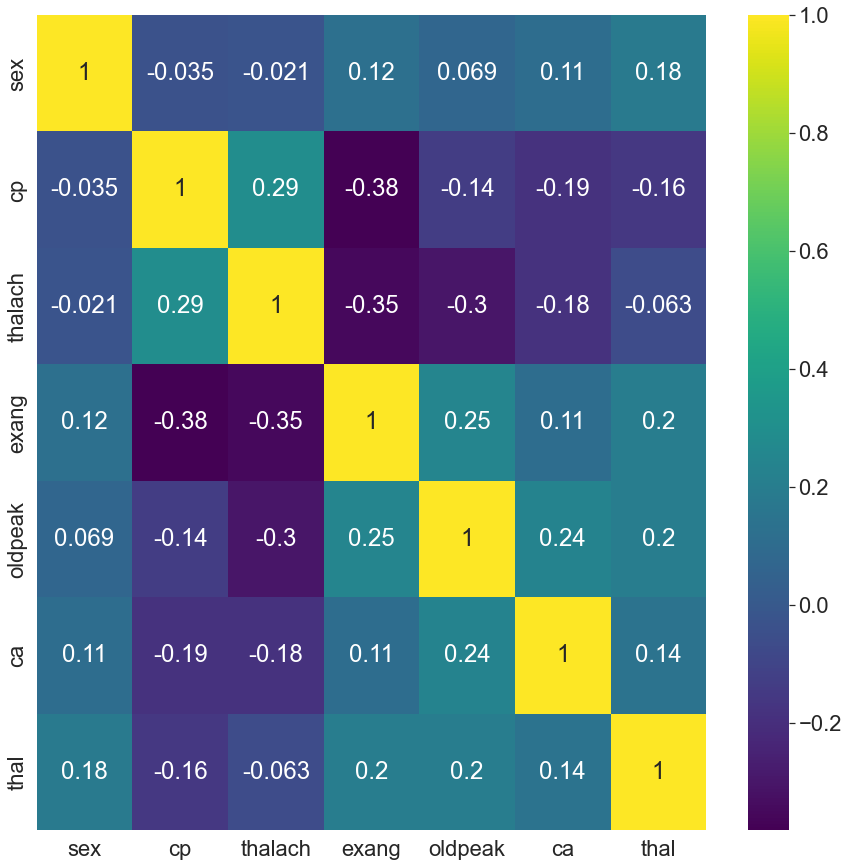

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[col].corr(), cmap="viridis", annot=True)

**As seen in the heatmap, the features are not very correlated and hence we will proceed further with the analysis with this features only.**

### Preparing Final training model

In [52]:
X_train_sm = sm.add_constant(X_train[col])
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  272
Model:                            GLM   Df Residuals:                      264
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99.843
Date:                Fri, 16 Sep 2022   Deviance:                       199.69
Time:                        16:29:14   Pearson chi2:                     260.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3317      0.388      3.429      0.001       0.570       2.093
sex           -1.2779      0.425     -3.008      0.003      -2.111      -0.445
cp             0.9049      0.193      4.685      0.000       0.526       1.283
thalach        0.4827      0.209      2.307      0.021       0.073       0.893
exang         -1.0067      0.413     -2.437      0.015      -1.817      -0.197
oldpeak       -0.8270      0.218     -3.796      0.000      -1.254      -0.400
ca            -0.8315      0.191     -4.348      0.000      -1.206      -0.457
thal          -0.6157      0.180     -3.416      0.001      -0.969      -0.262
==============================================================================
"""

**Predicting on X_train**

In [53]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

13     0.731512
176    0.025658
171    0.584359
128    0.985050
119    0.755736
133    0.853493
155    0.777095
90     0.815686
157    0.900862
208    0.071519
dtype: float64

In [54]:
#Creating a consolidated y_train_pred_final 
y_train_pred_final = pd.DataFrame({'Target':y_train.values, 'Target_Prob':y_train_pred})
y_train_pred_final.head()

,Target,Target_Prob
13,1,0.731512
176,0,0.025658
171,0,0.584359
128,1,0.985050
119,1,0.755736


In [55]:
#Here we are taking a arbitrary cut-off of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Target_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Target,Target_Prob,Predicted
13,1,0.731512,1
176,0,0.025658,0
171,0,0.584359,1
128,1,0.985050,1
119,1,0.755736,1


### Model Evaluation

In [56]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [57]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.Predicted )
confusion

array([[ 96,  27],
       [ 15, 134]], dtype=int64)

In [58]:
# Predicted     Negative  Positive
# Actual
# Negative        96       27
# Positive        15      134

**Accuracy:**

In [59]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.Predicted)


0.8455882352941176

In [60]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

**Sensitivity:**

In [61]:
TP/(TP+FN)

0.8993288590604027

**Specificity**

In [62]:
# Calculating the 
TN/(TN+FP)

0.7804878048780488

### Optimising Cut off (ROC Curve)

In [63]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for the Model')
    plt.legend(loc="lower right")
    plt.show()

    return None

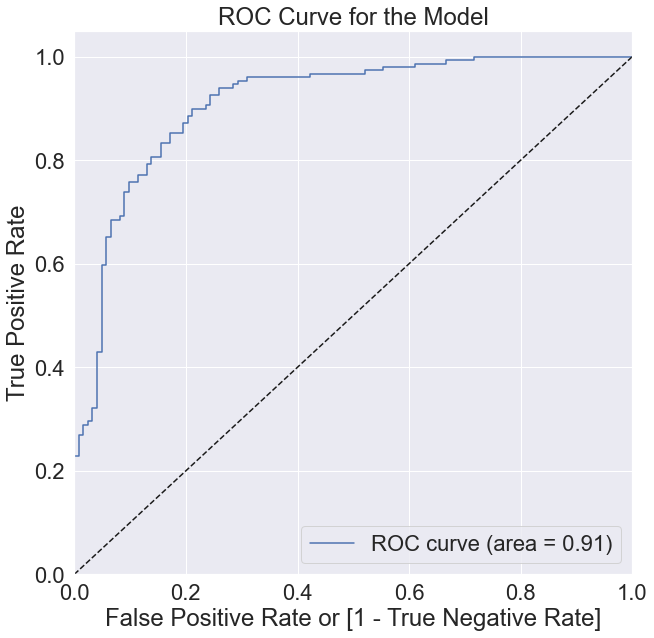

In [64]:
# Calling the ROC function
draw_roc(y_train_pred_final.Target, y_train_pred_final.Target_Prob)

In [65]:
# Creating columns to check the Predicted Values with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Target_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Target,Target_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
13,1,0.731512,1,1,1,1,1,1,1,1,1,0,0
176,0,0.025658,0,1,0,0,0,0,0,0,0,0,0
171,0,0.584359,1,1,1,1,1,1,1,0,0,0,0
128,1,0.985050,1,1,1,1,1,1,1,1,1,1,1
119,1,0.755736,1,1,1,1,1,1,1,1,1,0,0


In [66]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.547794,1.000000,0.000000
0.1,0.1,0.735294,0.973154,0.447154
0.2,0.2,0.797794,0.959732,0.601626
0.3,0.3,0.838235,0.959732,0.691057
0.4,0.4,0.849265,0.939597,0.739837
0.5,0.5,0.845588,0.899329,0.780488
0.6,0.6,0.834559,0.838926,0.829268
0.7,0.7,0.819853,0.758389,0.894309
0.8,0.8,0.779412,0.651007,0.934959
0.9,0.9,0.658088,0.409396,0.959350


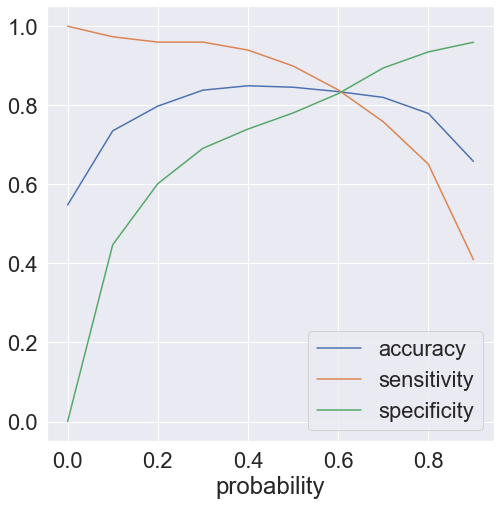

In [67]:
# Plotting the accuracy, sensitivity and specificity
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(8,8))
plt.show()

**From the above curve we can consider 0.6 as the cut-off point**

In [68]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Target_Prob.map( lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,Target,Target_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
13,1,0.731512,1,1,1,1,1,1,1,1,1,0,0,1
176,0,0.025658,0,1,0,0,0,0,0,0,0,0,0,0
171,0,0.584359,1,1,1,1,1,1,1,0,0,0,0,0
128,1,0.985050,1,1,1,1,1,1,1,1,1,1,1,1
119,1,0.755736,1,1,1,1,1,1,1,1,1,0,0,1


**Accuracy:**

In [69]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

0.8345588235294118

In [70]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

array([[102,  21],
       [ 24, 125]], dtype=int64)

In [71]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

**Sensitivity:**

In [72]:
# Calculating the sensitivity
TP/(TP+FN)

0.8389261744966443

**Specificity:**

In [73]:
# Calculating the specificity
TN/(TN+FP)

0.8292682926829268

## Prediction on Test set

In [74]:
X_test=X_test[col]

In [75]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,sex,cp,thalach,exang,oldpeak,ca,thal
221,1.0,1,-0.946924,-1.709357,1,4.118406,-0.714226,1.141790
8,1.0,1,1.004313,0.527221,0,-0.432377,-0.714226,1.141790
89,1.0,0,-0.946924,-1.226958,0,0.013778,-0.714226,-0.484215
154,1.0,0,1.004313,0.088676,0,-0.878532,-0.714226,-0.484215
201,1.0,1,-0.946924,-0.393723,1,1.619937,0.262002,1.141790
12,1.0,1,0.028695,0.921911,0,-0.343146,-0.714226,-0.484215
65,1.0,0,-0.946924,1.404310,0,0.370702,-0.714226,-0.484215
187,1.0,1,-0.946924,-1.797066,1,1.084551,0.262002,1.141790
240,1.0,1,1.004313,-1.665503,1,1.709168,0.262002,1.141790
117,1.0,1,1.979932,0.527221,0,0.816858,-0.714226,1.141790


In [76]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [77]:
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)


In [78]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [79]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [80]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Target_Prob'})
y_pred_final.head()

,target,Target_Prob
0,0,0.002128
1,1,0.812372
2,1,0.682025
3,1,0.980196
4,0,0.013918


In [81]:
# Making prediction using cut off 0.60
y_pred_final['final_predicted'] = y_pred_final.Target_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_pred_final

,target,Target_Prob,final_predicted
0,0,0.002128,0
1,1,0.812372,1
2,1,0.682025,1
3,1,0.980196,1
4,0,0.013918,0
5,1,0.845606,1
6,1,0.850450,1
7,0,0.011039,0
8,0,0.039824,0
9,1,0.788377,1


**Accuracy:**

In [82]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['target'], y_pred_final.final_predicted)

0.8387096774193549

**Creating Confusion Matrix:**

In [83]:
confusion2 = metrics.confusion_matrix(y_pred_final['target'], y_pred_final.final_predicted )
confusion2

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [84]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

**Sensitivity:**

In [85]:
# Calculating the sensitivity
TP/(TP+FN)

0.875

**Specificity:**

In [86]:
# Calculating the specificity
TN/(TN+FP)

0.8

### Precision-Recall

In [87]:
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.Predicted )
confusion

array([[ 96,  27],
       [ 15, 134]], dtype=int64)

**Precision**

In [88]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8322981366459627

**Recall**

In [89]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8993288590604027

**Precision and recall tradeoff**

In [90]:
from sklearn.metrics import precision_recall_curve

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Target, y_train_pred_final.Target_Prob)

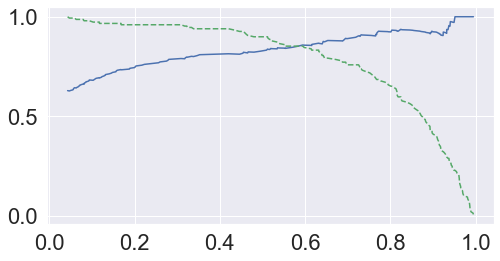

In [92]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g--")
plt.show()

**From Precision-Recall Tradeoff we get similar values for the Cut-off. To re-validate we will do the necessary checks again.**

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Target_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,Target,Target_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
13,1,0.731512,1,1,1,1,1,1,1,1,1,0,0,1
176,0,0.025658,0,1,0,0,0,0,0,0,0,0,0,0
171,0,0.584359,1,1,1,1,1,1,1,0,0,0,0,0
128,1,0.985050,1,1,1,1,1,1,1,1,1,1,1,1
119,1,0.755736,1,1,1,1,1,1,1,1,1,0,0,1


In [94]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

0.8345588235294118

In [95]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

array([[102,  21],
       [ 24, 125]], dtype=int64)

In [96]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [97]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8561643835616438

In [98]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8389261744966443

### Prediction on Test set

In [99]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Target_Prob','target':'Target'})
y_pred_final.head()

,Target,Target_Prob
0,0,0.002128
1,1,0.812372
2,1,0.682025
3,1,0.980196
4,0,0.013918


In [100]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Target_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Target,Target_Prob,final_predicted
0,0,0.002128,0
1,1,0.812372,1
2,1,0.682025,1
3,1,0.980196,1
4,0,0.013918,0


In [101]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Target'], y_pred_final.final_predicted)

0.8387096774193549

In [102]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Target'], y_pred_final.final_predicted )
confusion2

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [103]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

**Precision**

In [104]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8235294117647058

**Recall**

In [105]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.875

### Conclusion

**The major attributes impacting the diagnosis of a heart disease are:**
   - exercise induced angina
   - sex of the patient
   - chest pain type (4 values)
   - oldpeak = ST depression induced by exercise relative to rest
   - number of major vessels (0-3) colored by flourosopy
   - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected. **The model designed has a recall of 87.5% which implies that it can identify 87.5% of the positive cases correctly.**

* Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives). **The model has a precision of 82.35% which means out of 100 positive cases it recognises, 82 will actually be positive.**

## <center> Thank You!</center> 